# Keras NMIST Fashion

## Prerequisites
Check [requirements.txt](./requirements.txt) if using pip or [environment.yml](./environment.yml) if using conda.

In [10]:
!pip install -U tensorflow\[and-cuda\] matplotlib numpy 

## Check GPU availability

In [11]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


## Load Data

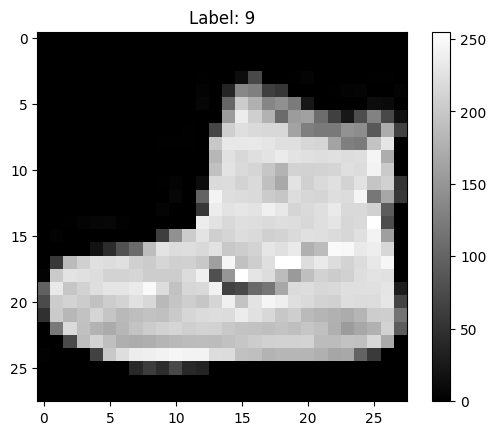

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.colorbar()
plt.show()

## First Model

Epoch 1/10


2023-11-07 12:33:07.925783: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.
2023-11-07 12:33:08.033009: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


750/750 [==============================] - 5s 6ms/step - loss: 0.5778 - accuracy: 0.7861 - val_loss: 0.4542 - val_accuracy: 0.8346
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3606 - accuracy: 0.8706 - val_loss: 0.3336 - val_accuracy: 0.8787
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3095 - accuracy: 0.8869 - val_loss: 0.3137 - val_accuracy: 0.8871
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2776 - accuracy: 0.8985 - val_loss: 0.2945 - val_accuracy: 0.8944
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2547 - accuracy: 0.9057 - val_loss: 0.2796 - val_accuracy: 0.8990
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2321 - accuracy: 0.9148 - val_loss: 0.2697 - val_accuracy: 0.9031
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2147 - accuracy: 0.9214 - val_loss: 0.2623 - val_accuracy: 0.9005
Epoch 8/10
750/75

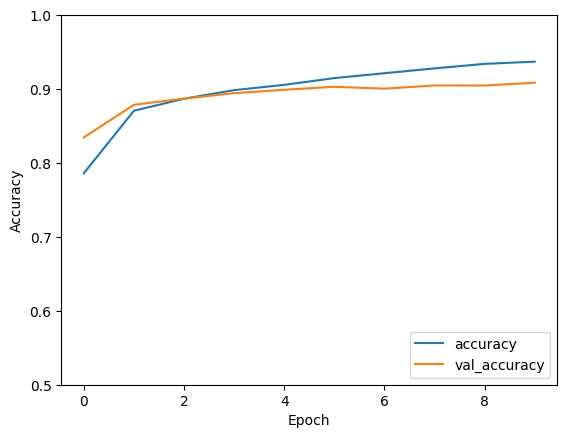

In [13]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
